In [1]:
import keras
from keras.datasets import boston_housing

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

from sklearn import preprocessing
from sklearn.preprocessing import scale
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train[0]

57026/57026 [==============================] - 0s 0us/step


array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [3]:
x_train_scaled = preprocessing.scale(x_train)

x_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [4]:

x_test_scaled = preprocessing.scale(x_test)
x_train_scaled[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='sgd', metrics=['mse'])


In [6]:
history = model.fit(x_train_scaled, y_train,
 batch_size=128,
epochs=500,
verbose=1,
validation_split = 0.2,
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 100)]
)

Epoch 1/500
3/3 [==============================] - 6s 97ms/step - loss: 548.2597 - mse: 548.2597 - val_loss: 332.7019 - val_mse: 332.7019
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 318.0532 - mse: 318.0532 - val_loss: 409.4595 - val_mse: 409.4595
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 248.4189 - mse: 248.4189 - val_loss: 518.4212 - val_mse: 518.4212
Epoch 4/500
3/3 [==============================] - 0s 16ms/step - loss: 584.7883 - mse: 584.7883 - val_loss: 527.3553 - val_mse: 527.3553
Epoch 5/500
3/3 [==============================] - 0s 15ms/step - loss: 432.6858 - mse: 432.6858 - val_loss: 305.4814 - val_mse: 305.4814
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 202.5455 - mse: 202.5455 - val_loss: 207.9516 - val_mse: 207.9516
Epoch 7/500
3/3 [==============================] - 0s 25ms/step - loss: 157.3030 - mse: 157.3030 - val_loss: 82.0180 - val_mse: 82.0180
Epoch 8/500
3/3 [===================

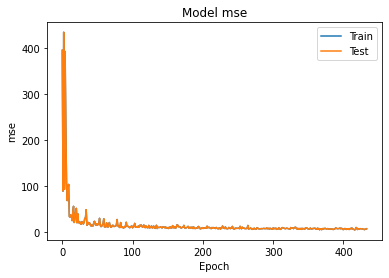

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'])
plt.plot(history.history['mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

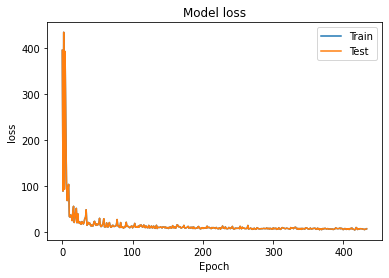

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 15.969075202941895
Test accuracy: 15.969075202941895


In [ ]:

prediction = model.predict(x_test_scaled)
print(prediction.flatten())
print(y_test)


[ 9.04857   18.101406  19.693653  27.038471  22.28652   22.652222
 29.611649  21.32165   18.129112  21.643555  16.224134  15.536185
 14.034552  43.341263  14.006704  21.873627  24.86053   21.055733
 19.297731  20.71751    9.165066  12.31724   20.640331  16.693398
 19.71592   22.430674  31.551048  26.237293   9.68444   20.34284
 19.84233   12.454626  32.281906  23.563648  14.534372   8.089436
 16.232227  18.686663  16.999165  26.329565  31.829424  28.376713
 11.007206  43.49939   30.707806  23.961777  28.289911  18.664917
 21.244797  23.17041   34.03517   18.854294   9.189704  12.422479
 37.66192   26.558195   9.437527  53.78791   32.81537   20.86354
 24.59156   12.133696  12.176035  19.827738  23.756382  20.172071
 11.457863  21.806366  13.560716   7.9857745 18.792933  29.69666
 22.901539  14.151187  26.429876  19.25064   19.948381  25.194632
 36.305477   8.749267  20.438927  41.223045  18.52324   10.87339
 18.760159  17.288696  13.456305  19.696075  20.66751   29.171
 18.170933  20.00